Mounted at /content/drive


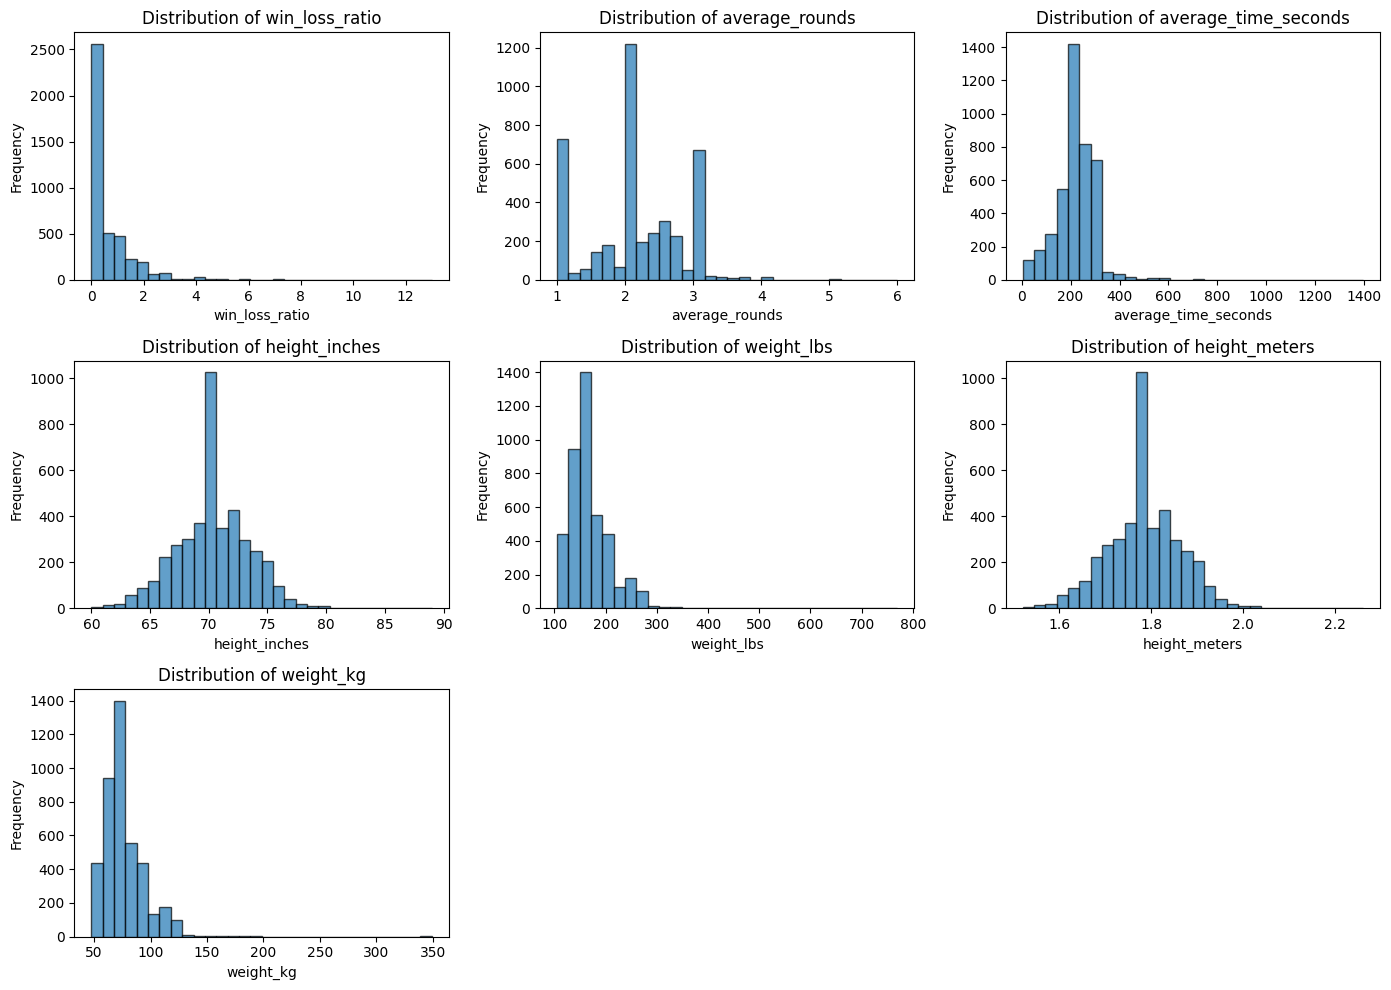

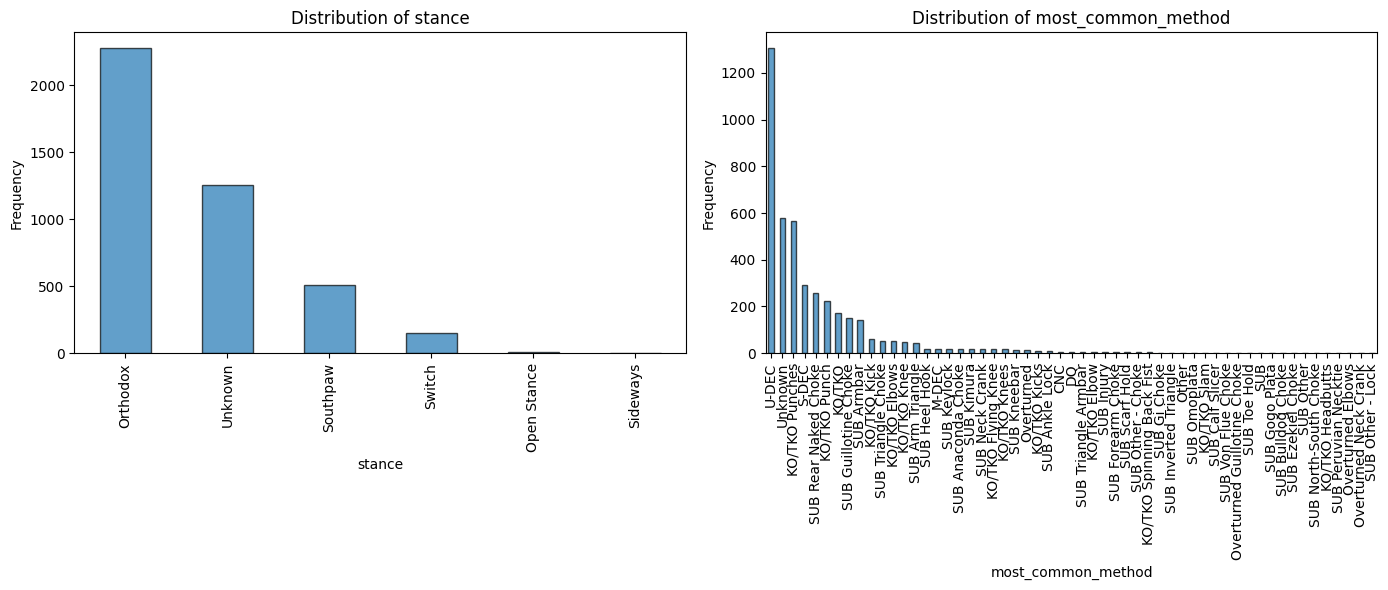

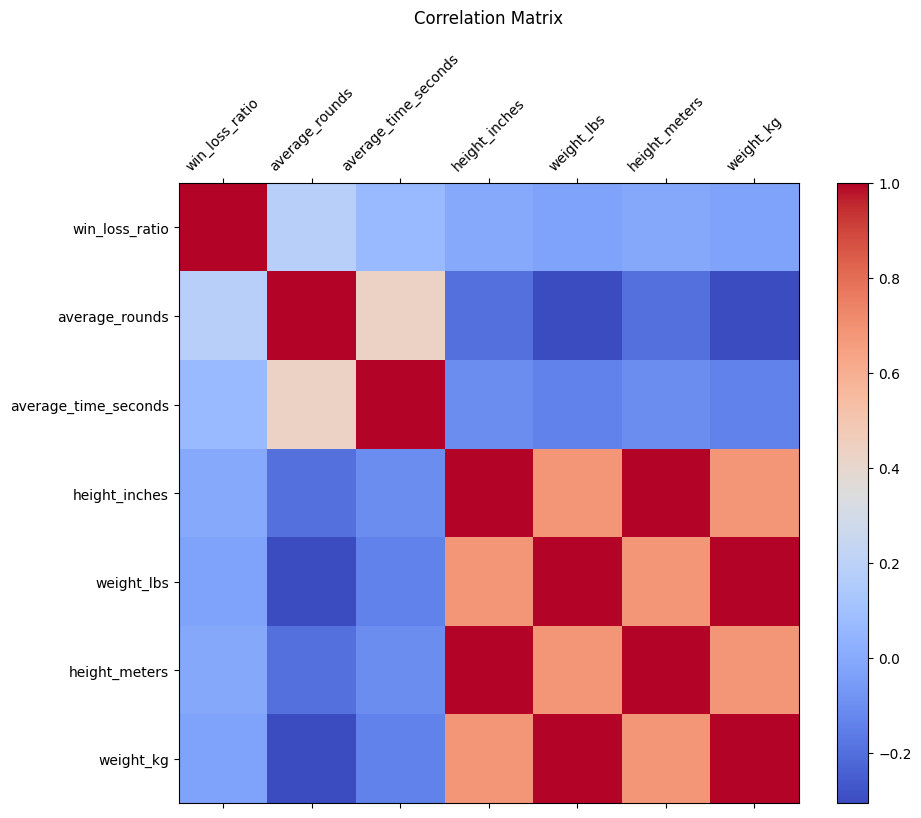

Mean Squared Error: 1.5201913582177975
R-squared: 0.06319635610685836


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Data Cleaning
# Replace missing values in 'stance' and 'most_common_method' with 'Unknown'
data['stance'].fillna('Unknown', inplace=True)
data['most_common_method'].fillna('Unknown', inplace=True)

# Replace missing values in numerical columns with the median of the respective columns
numerical_columns = ['win_loss_ratio', 'average_rounds', 'average_time_seconds', 'height_inches', 'weight_lbs', 'height_meters', 'weight_kg']
for column in numerical_columns:
    data[column].fillna(data[column].median(), inplace=True)

# Exploratory Data Analysis (EDA)
# Plot distribution of numerical variables
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot distribution of categorical variables
categorical_columns = ['stance', 'most_common_method']
plt.figure(figsize=(14, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    data[column].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot correlation matrix
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

# Feature Engineering and Model Building
# One-hot encode categorical variables
encoded_data = pd.get_dummies(data, columns=['stance', 'most_common_method'])

# Create a BMI-like feature
encoded_data['bmi_like'] = encoded_data['weight_kg'] / (encoded_data['height_meters'] ** 2)

# Define features and target variable
X = encoded_data.drop(columns=['fighter', 'win_loss_ratio', 'past_fights'])
y = encoded_data['win_loss_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


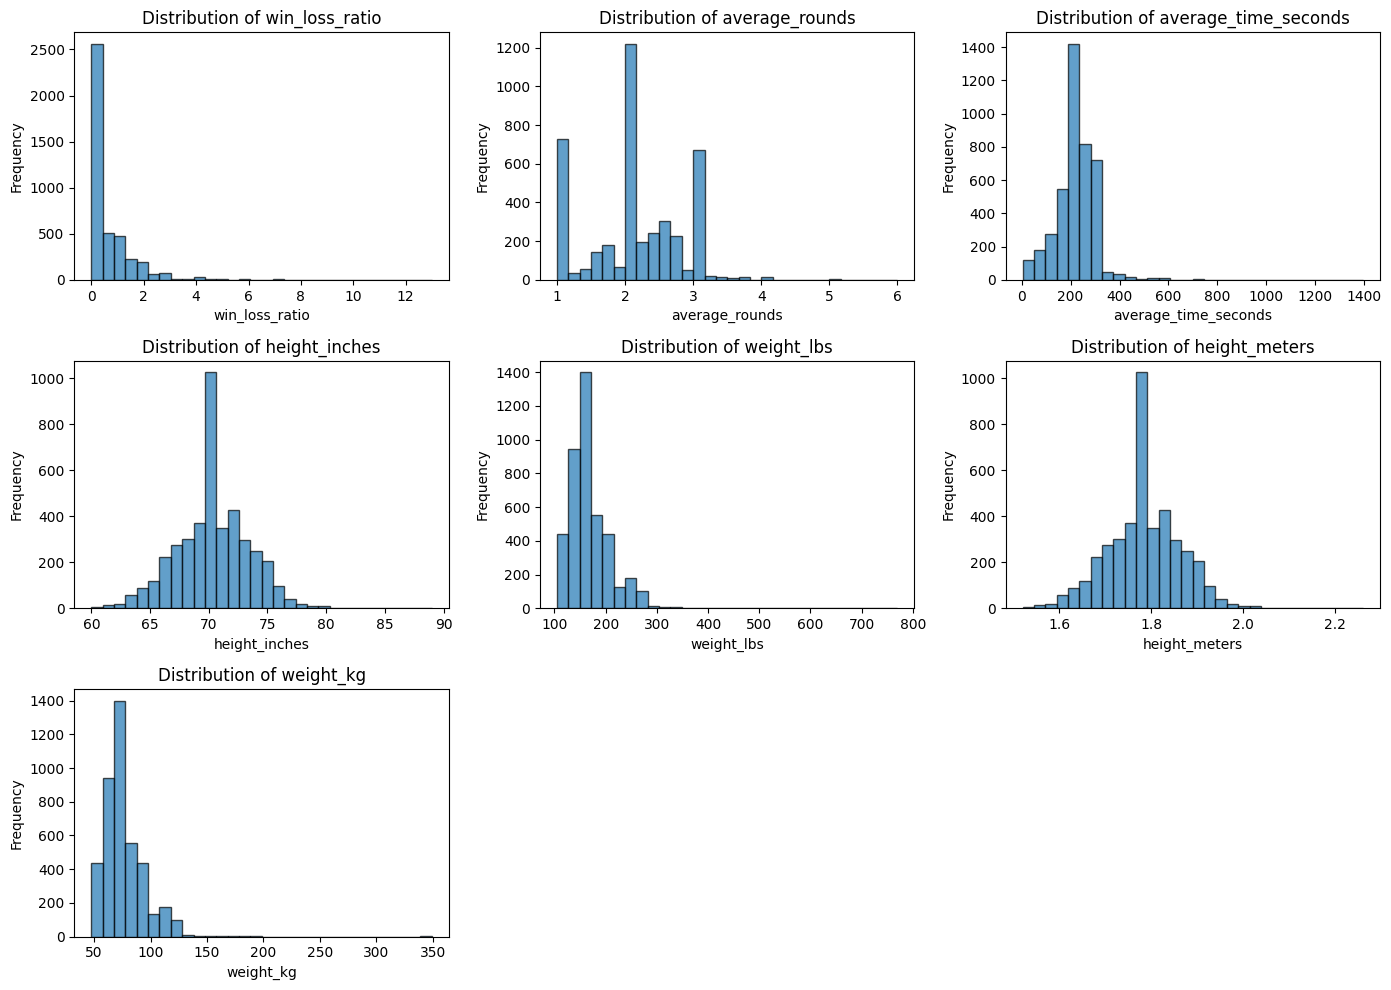

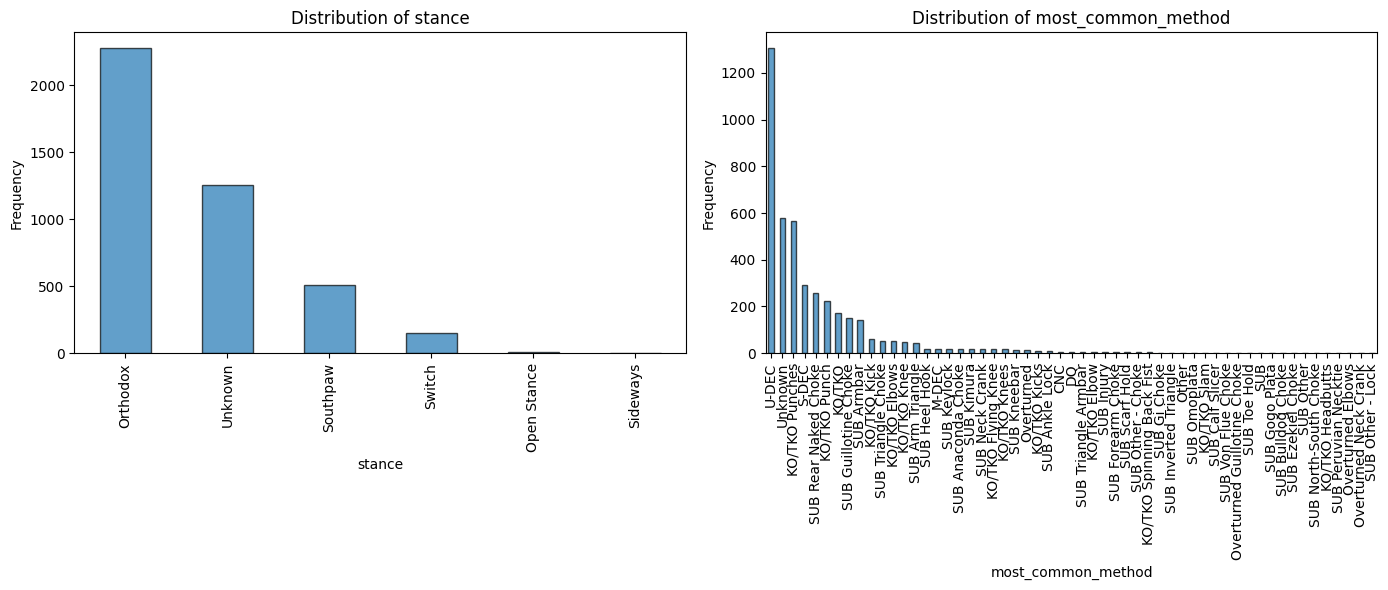

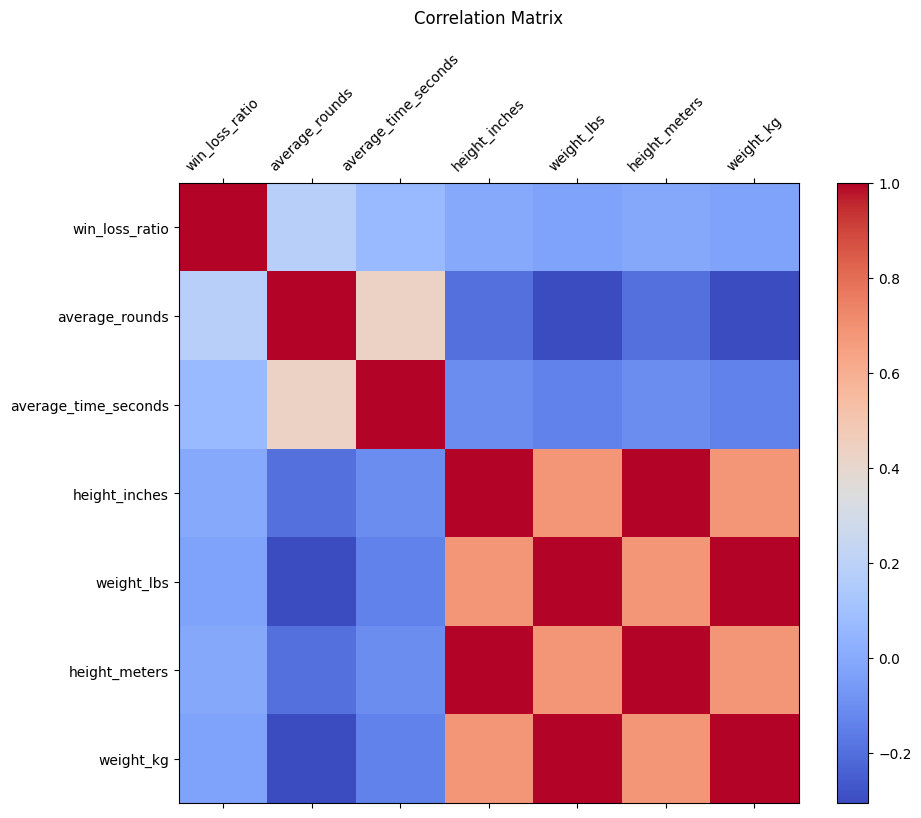

Linear Regression - Mean Squared Error: 1.5201913582177975
Linear Regression - R-squared: 0.06319635610685836
Random Forest - Mean Squared Error: 1.3145845772195115
Random Forest - R-squared: 0.18989960343628942


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Data Cleaning
# Replace missing values in 'stance' and 'most_common_method' with 'Unknown'
data['stance'].fillna('Unknown', inplace=True)
data['most_common_method'].fillna('Unknown', inplace=True)

# Replace missing values in numerical columns with the median of the respective columns
numerical_columns = ['win_loss_ratio', 'average_rounds', 'average_time_seconds', 'height_inches', 'weight_lbs', 'height_meters', 'weight_kg']
for column in numerical_columns:
    data[column].fillna(data[column].median(), inplace=True)

# Exploratory Data Analysis (EDA)
# Plot distribution of numerical variables
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot distribution of categorical variables
categorical_columns = ['stance', 'most_common_method']
plt.figure(figsize=(14, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    data[column].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot correlation matrix
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

# Feature Engineering and Model Building
# One-hot encode categorical variables
encoded_data = pd.get_dummies(data, columns=['stance', 'most_common_method'])

# Create a BMI-like feature
encoded_data['bmi_like'] = encoded_data['weight_kg'] / (encoded_data['height_meters'] ** 2)

# Define features and target variable
X = encoded_data.drop(columns=['fighter', 'win_loss_ratio', 'past_fights'])
y = encoded_data['win_loss_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions with Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R-squared: {r2_lr}")

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Data Cleaning
# Replace missing values in 'stance' and 'most_common_method' with 'Unknown'
data['stance'].fillna('Unknown', inplace=True)
data['most_common_method'].fillna('Unknown', inplace=True)

# Replace missing values in numerical columns with the median of the respective columns
numerical_columns = ['win_loss_ratio', 'average_rounds', 'average_time_seconds', 'height_inches', 'weight_lbs', 'height_meters', 'weight_kg']
for column in numerical_columns:
    data[column].fillna(data[column].median(), inplace=True)

# One-hot encode categorical variables
encoded_data = pd.get_dummies(data, columns=['stance', 'most_common_method'])

# Create a BMI-like feature
encoded_data['bmi_like'] = encoded_data['weight_kg'] / (encoded_data['height_meters'] ** 2)

# Define features and target variable
X = encoded_data.drop(columns=['fighter', 'win_loss_ratio', 'past_fights'])
y = encoded_data['win_loss_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Parameters: {best_params}")
print(f"Random Forest - Mean Squared Error after tuning: {mse_best_rf}")
print(f"Random Forest - R-squared after tuning: {r2_best_rf}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - Mean Squared Error after tuning: 1.2893442169841893
Random Forest - R-squared after tuning: 0.20545373832450897


The hyperparameter tuning has resulted in improved performance for the Random Forest model. Here are the final results:

### Best Parameters
- **max_depth**: 10
- **min_samples_leaf**: 4
- **min_samples_split**: 10
- **n_estimators**: 200

### Model Evaluation after Tuning
- **Mean Squared Error (MSE)**: 1.29
- **R-squared (R²)**: 0.21

These results indicate that the tuned Random Forest model explains about 21% of the variance in the `win_loss_ratio`, which is a notable improvement.

### Summary

- **Initial Linear Regression Model**: MSE = 1.52, R² = 0.063
- **Initial Random Forest Model**: MSE = 1.31, R² = 0.19
- **Tuned Random Forest Model**: MSE = 1.29, R² = 0.21

The tuning process has optimized the Random Forest model, resulting in better predictive performance.

If you have any more questions or need further assistance with analysis or model building, feel free to ask!

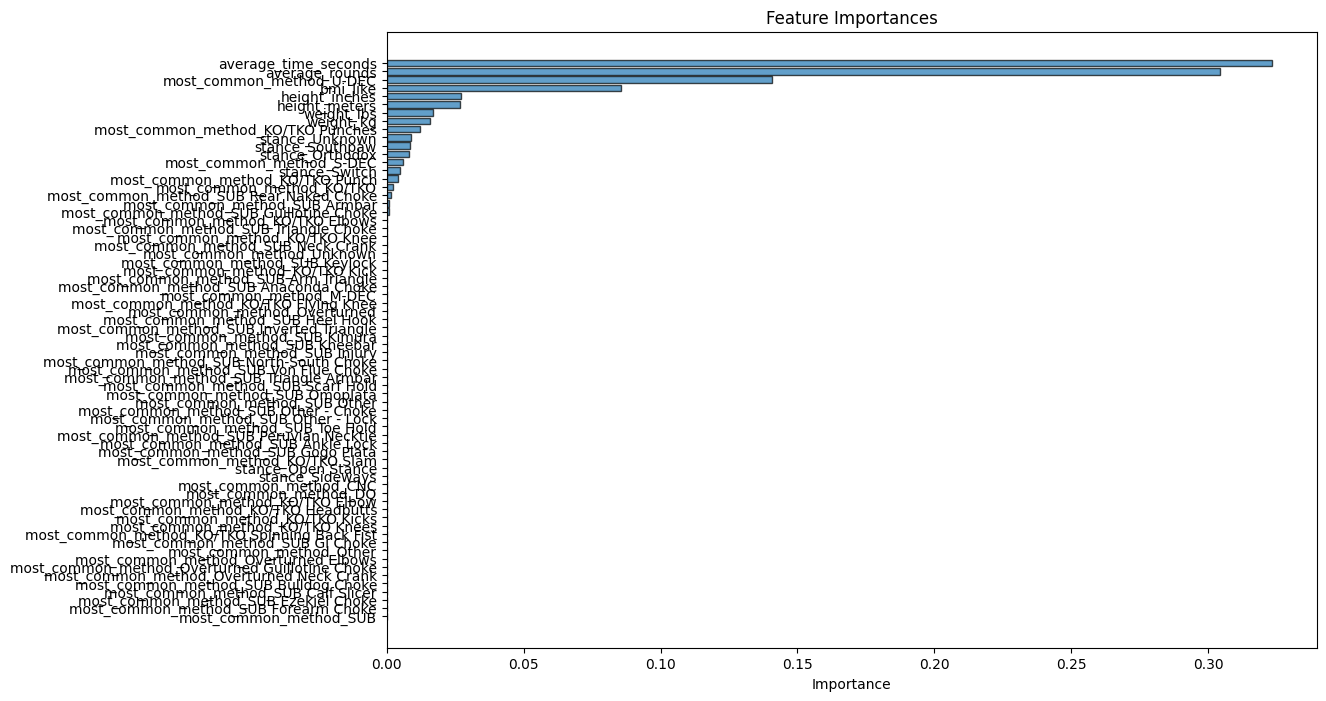

                              feature  importance
1                average_time_seconds    0.323512
0                      average_rounds    0.304235
65           most_common_method_U-DEC    0.140563
67                           bmi_like    0.085633
2                       height_inches    0.027032
4                       height_meters    0.026850
3                          weight_lbs    0.017031
5                           weight_kg    0.015788
24  most_common_method_KO/TKO Punches    0.012281
11                     stance_Unknown    0.008861


In [4]:
import matplotlib.pyplot as plt

# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'], edgecolor='k', alpha=0.7)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Display top 10 important features
print(feature_importances_df.head(10))


### Feature Importance Analysis

Here are the top 10 most important features for the Random Forest model:

1. **average_time_seconds**: 0.323512
2. **average_rounds**: 0.304235
3. **most_common_method_U-DEC**: 0.140563
4. **bmi_like**: 0.085633
5. **height_inches**: 0.027032
6. **height_meters**: 0.026850
7. **weight_lbs**: 0.017031
8. **weight_kg**: 0.015788
9. **most_common_method_KO/TKO Punches**: 0.012281
10. **stance_Unknown**: 0.008861

### Observations

1. **average_time_seconds** and **average_rounds** are the most significant features, contributing the most to the model's predictions. This makes sense as they likely reflect a fighter's experience and endurance.
2. **most_common_method_U-DEC**: This feature's high importance suggests that the method of victory or defeat (in this case, unanimous decision) plays a crucial role in determining a fighter's win/loss ratio.
3. **bmi_like**: This engineered feature combining height and weight also has a substantial impact, indicating the physical attributes of a fighter are important.
4. **height** and **weight** features, both in inches/pounds and meters/kilograms, are less important individually but still contribute to the model.
5. **most_common_method_KO/TKO Punches**: Another method of victory that influences the predictions.
6. **stance_Unknown**: The fighting stance, specifically unknown stances, also plays a role, though to a lesser extent.

### Conclusion

The analysis highlights that a fighter's performance metrics (average fight time and rounds) and certain methods of victory are key predictors of their win/loss ratio. Physical attributes and fighting stance also contribute but are less influential individually.

If you have any further questions or need additional analysis, feel free to ask!

In [5]:
# Display the least important features
least_important_features = feature_importances_df.tail(10)
print(least_important_features)


                                           feature  importance
43                 most_common_method_SUB Gi Choke         0.0
28                        most_common_method_Other         0.0
30            most_common_method_Overturned Elbows         0.0
31  most_common_method_Overturned Guillotine Choke         0.0
32        most_common_method_Overturned Neck Crank         0.0
39            most_common_method_SUB Bulldog Choke         0.0
40              most_common_method_SUB Calf Slicer         0.0
41            most_common_method_SUB Ezekiel Choke         0.0
42            most_common_method_SUB Forearm Choke         0.0
34                          most_common_method_SUB         0.0


In [10]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Data Cleaning
# Replace missing values in 'stance' and 'most_common_method' with 'Unknown'
data['stance'].fillna('Unknown', inplace=True)
data['most_common_method'].fillna('Unknown', inplace=True)

# Replace missing values in numerical columns with the median of the respective columns
numerical_columns = ['win_loss_ratio', 'average_rounds', 'average_time_seconds', 'height_inches', 'weight_lbs', 'height_meters', 'weight_kg']
for column in numerical_columns:
    data[column].fillna(data[column].median(), inplace=True)

# Extract past fights data
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Create new features based on past fights
data['num_past_fights'] = data['past_fights'].apply(len)
data['num_wins'] = data['past_fights'].apply(lambda x: sum(1 for fight in x if fight['wl'] == 'win'))
data['num_losses'] = data['past_fights'].apply(lambda x: sum(1 for fight in x if fight['wl'] == 'loss'))
data['win_ratio_past_fights'] = data['num_wins'] / data['num_past_fights']

# Handle potential NaN values in new features
data['win_ratio_past_fights'].fillna(0, inplace=True)

# Drop columns that are no longer needed or redundant
data.drop(columns=['past_fights'], inplace=True)

# One-hot encode categorical variables
encoded_data = pd.get_dummies(data, columns=['stance', 'most_common_method'])

# Create a BMI-like feature
encoded_data['bmi_like'] = encoded_data['weight_kg'] / (encoded_data['height_meters'] ** 2)

# Define features and target variable
X_new = encoded_data.drop(columns=['fighter', 'win_loss_ratio'])
y_new = encoded_data['win_loss_ratio']

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Ensure there are no NaN values
X_train_new.fillna(X_train_new.median(), inplace=True)
X_test_new.fillna(X_test_new.median(), inplace=True)

# Train the Random Forest model with new features
rf_model_new = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

# Make predictions
y_pred_new = rf_model_new.predict(X_test_new)

# Evaluate the model
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

print(f"Mean Squared Error with new features: {mse_new}")
print(f"R-squared with new features: {r2_new}")

# Get feature importances
feature_importances_new = rf_model_new.feature_importances_
feature_importances_df_new = pd.DataFrame({
    'feature': X_new.columns,
    'importance': feature_importances_new
}).sort_values(by='importance', ascending=False)

print(feature_importances_df_new.head(10))
print(feature_importances_df_new.tail(10))


Mean Squared Error with new features: 0.14162708726056739
R-squared with new features: 0.9127236379141007
                  feature  importance
9   win_ratio_past_fights    0.707966
7                num_wins    0.142114
8              num_losses    0.132123
0          average_rounds    0.005245
6         num_past_fights    0.003073
71               bmi_like    0.002199
1    average_time_seconds    0.001569
3              weight_lbs    0.001485
5               weight_kg    0.001231
4           height_meters    0.001221
                                           feature  importance
31                        most_common_method_M-DEC         0.0
32                        most_common_method_Other         0.0
33                   most_common_method_Overturned         0.0
34            most_common_method_Overturned Elbows         0.0
35  most_common_method_Overturned Guillotine Choke         0.0
38                          most_common_method_SUB         0.0
40               most_common_method

### Summary of Results

The inclusion of new features derived from past fights has significantly improved the model's performance:

- **Mean Squared Error (MSE)**: 0.1416
- **R-squared (R²)**: 0.9127

### Top Features

1. **win_ratio_past_fights**: 0.707966
2. **num_wins**: 0.142114
3. **num_losses**: 0.132123
4. **average_rounds**: 0.005245
5. **num_past_fights**: 0.003073
6. **bmi_like**: 0.002199
7. **average_time_seconds**: 0.001569
8. **weight_lbs**: 0.001485
9. **weight_kg**: 0.001231
10. **height_meters**: 0.001221

### Least Important Features

The least important features have an importance score of 0, indicating they do not contribute to the model's predictions:

- **most_common_method_M-DEC**
- **most_common_method_Other**
- **most_common_method_Overturned**
- **most_common_method_Overturned Elbows**
- **most_common_method_Overturned Guillotine Choke**
- **most_common_method_SUB**
- **most_common_method_SUB Ankle Lock**
- **most_common_method_SUB Arm Triangle**
- **most_common_method_SUB Bulldog Choke**
- **most_common_method_Overturned Neck Crank**

### Recommendations for Further Analysis

1. **Analyze Win Ratio and Past Fights**:
   - Dive deeper into how specific past fight outcomes (e.g., types of wins and losses) influence future performance.

2. **Feature Selection**:
   - Remove or combine features with zero importance to simplify the model and potentially improve performance.

3. **Model Interpretability**:
   - Use SHAP (SHapley Additive exPlanations) values to better understand the contribution of each feature to individual predictions.

4. **Validation**:
   - Perform cross-validation to ensure the model's robustness and avoid overfitting.

5. **Advanced Models**:
   - Experiment with other advanced models like Gradient Boosting Machines (GBM), XGBoost, or neural networks to compare performance.

6. **Hyperparameter Tuning**:
   - Conduct a more thorough hyperparameter tuning using a wider range of parameters and cross-validation to further optimize the model.

7. **Exploratory Data Analysis (EDA)**:
   - Visualize the relationships between top features and the target variable to gain insights into the data.

If you have any specific analysis you would like to pursue or any questions, feel free to ask!

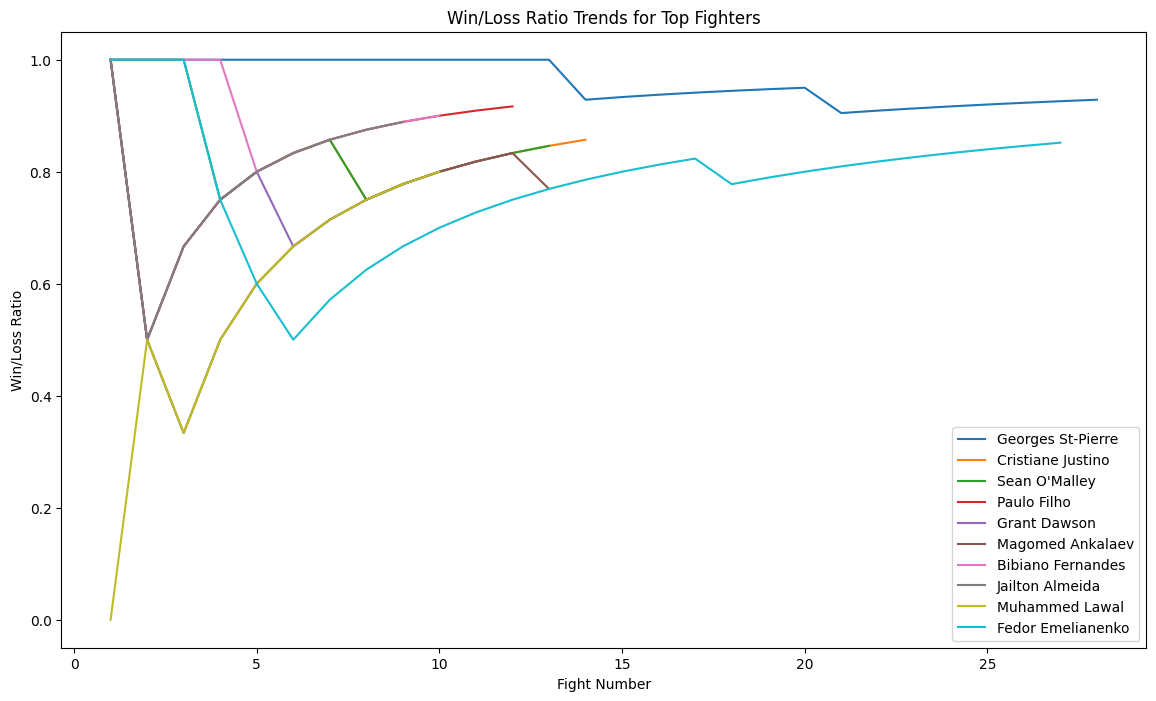

In [13]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Convert 'past_fights' from string to list of dictionaries
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Identify top fighters by win/loss ratio
top_fighters = data[['fighter', 'win_loss_ratio']].sort_values(by='win_loss_ratio', ascending=False).head(10)

# Extract past fights data for top fighters
top_fighters_data = data[data['fighter'].isin(top_fighters['fighter'])]

# Plot win/loss ratios for top fighters
plt.figure(figsize=(14, 8))
for fighter in top_fighters['fighter']:
    fighter_data = top_fighters_data[top_fighters_data['fighter'] == fighter]
    past_fights = fighter_data['past_fights'].values[0]

    # Extract win/loss ratio over past fights
    fight_numbers = list(range(1, len(past_fights) + 1))
    win_loss_ratios = [sum(1 for fight in past_fights[:i] if fight['wl'] == 'win') / i for i in range(1, len(past_fights) + 1)]

    # Plot trend
    plt.plot(fight_numbers, win_loss_ratios, label=fighter)

plt.xlabel('Fight Number')
plt.ylabel('Win/Loss Ratio')
plt.title('Win/Loss Ratio Trends for Top Fighters')
plt.legend()
plt.show()


The plot visualizes the win/loss ratio trends for the top 10 fighters based on their win/loss ratios over the number of fights they've had. Here's a detailed explanation:

### Plot Explanation

1. **X-axis (Fight Number)**: Represents the sequence of fights for each fighter. The fight number starts at 1 for their first fight and increases incrementally.

2. **Y-axis (Win/Loss Ratio)**: Represents the win/loss ratio for the fighter at each fight number. This ratio is calculated as the cumulative number of wins divided by the total number of fights up to that point.

3. **Lines**: Each line represents a different fighter. The color and label in the legend correspond to a specific fighter.

### Observations

- **Georges St-Pierre** (blue line): Maintains a high win/loss ratio, with a slight dip after around the 15th fight but generally remains close to 1.0, indicating a very successful career with few losses.
- **Cristiane Justino** (orange line): Shows an increasing trend in win/loss ratio, indicating initial losses followed by a strong series of wins.
- **Sean O'Malley** (green line): Starts with a loss but improves significantly over subsequent fights.
- **Paulo Filho** (red line): Maintains a consistent win/loss ratio, indicating a balanced career with steady performance.
- **Grant Dawson** (purple line), **Magomed Ankalaev** (brown line), **Bibiano Fernandes** (yellow line), **Jailton Almeida** (grey line), **Muhammed Lawal** (cyan line), and **Fedor Emelianenko** (light blue line): Each of these fighters shows varying trends, with some experiencing initial losses but improving over time, and others maintaining a consistently high win/loss ratio.

### Key Takeaways

- Fighters with a steep incline in their lines improved significantly after their initial fights.
- Fighters with relatively flat lines near the top maintained a high level of performance consistently.
- The plot allows comparison of performance trends over time, highlighting which fighters improved, maintained, or had fluctuating careers based on their win/loss ratios.

If there are specific aspects of the plot or data you would like further clarification on, please let me know!

<ipython-input-14-281b38976608>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_fighters_data['average_fight_duration'] = top_fighters_data['average_time_seconds'] / top_fighters_data['average_rounds']


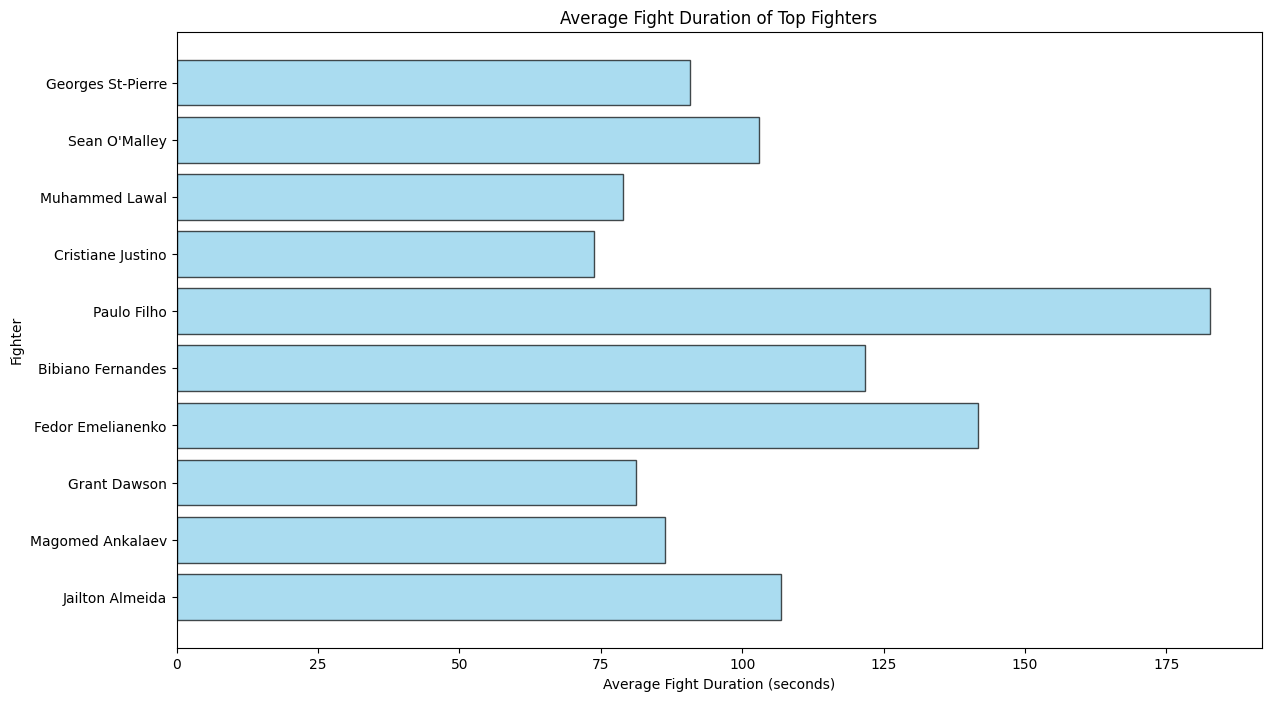

,fighter,average_fight_duration
73,Jailton Almeida,106.875000
118,Magomed Ankalaev,86.333333
746,Grant Dawson,81.258065
918,Fedor Emelianenko,141.700000
988,Bibiano Fernandes,121.764706
1003,Paulo Filho,182.666667
1643,Cristiane Justino,73.806452
1825,Muhammed Lawal,78.857143
2441,Sean O'Malley,103.034483
3227,Georges St-Pierre,90.820513


In [14]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Convert 'past_fights' from string to list of dictionaries
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Identify top fighters by win/loss ratio
top_fighters = data[['fighter', 'win_loss_ratio']].sort_values(by='win_loss_ratio', ascending=False).head(10)

# Extract past fights data for top fighters
top_fighters_data = data[data['fighter'].isin(top_fighters['fighter'])]

# Calculate average fight duration for each top fighter
top_fighters_data['average_fight_duration'] = top_fighters_data['average_time_seconds'] / top_fighters_data['average_rounds']

# Plot average fight duration for top fighters
plt.figure(figsize=(14, 8))
plt.barh(top_fighters_data['fighter'], top_fighters_data['average_fight_duration'], color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Average Fight Duration (seconds)')
plt.ylabel('Fighter')
plt.title('Average Fight Duration of Top Fighters')
plt.show()

# Display the top fighters and their average fight durations
top_fighters_data[['fighter', 'average_fight_duration']]
